<a href="https://codeimmersives.com"><img src = "https://www.codeimmersives.com/wp-content/uploads/2019/09/CodeImmersives_Logo_RGB_NYC_BW.png" width = 400> </a>


<h1 align=center><font size = 5>Agenda</font></h1>

### 
<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Review](#0)<br>
2.  [Skewness](#2)<br> 
3.  [Kutosis](#4)<br>    
4.  [Aggregating Data](#6)<br> 
5.  [Quartiles](#8)<br>   
6.  [Deciles](#10)<br>     
7.  [Exercise 1](#12)<br> 
8.  [Exercise 2](#14)<br>
9.  [Exercise 3](#16)<br>    
</div>
<hr>

<h2>Review</h2><a id="0"></a>

<h2>Exercise</h2>
You have the following dictionary that contains sales data.<br>
<code>
sales = {'Jan': 150, 'Feb':200, 'Mar': 175,
        'April': 75, 'May': 80, 'Jun': 300,
        'July': 250, 'August':130, 'September': 195,
        'October': 75, 'November': 120, 'December': 400}
</code>
<br>
Answer the following:<br>
1 - List the months where sales are greater than or equal to 150<br>
2 - Return a tuple of all months and sales amounts greater than or equal to 300<br>
3 - List all 3 consecutive month periods where sales are below 500<br>
4 - Include the total sales amount for answer 3

<h4>Solution</h4>

In [2]:
sales = {'JAN': 150, 'FEB':200, 'MAR': 175,
        'APR': 75, 'MAY': 80, 'JUN': 300,
        'JUL': 250, 'AUG':130, 'SEP': 195,
        'OCT': 75, 'NOV': 120, 'DEC': 400}
# 1
months = [mon for mon,val in sales.items() if val >= 150]
print(months)
print('='*35)

# 2
months = [(mon,val) for mon,val in sales.items() if val >= 300]
print(months)
print('='*35)

# 3
short_month = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
months = [ f'{short_month[x]},{short_month[x+1]},{short_month[x+2]}' 
          for x in range(9) if sales[short_month[x]] + sales[short_month[x+1]] + sales[short_month[x+2]]< 500]
print(months)
print('='*35)

# 4
short_month = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
months = [ f'{short_month[x]},{short_month[x+1]},{short_month[x+2]}: {sales[short_month[x]] + sales[short_month[x+1]] + sales[short_month[x+2]]}' 
          for x in range(9) if sales[short_month[x]] + sales[short_month[x+1]] + sales[short_month[x+2]]< 500]
print(months)
print('='*35)

['JAN', 'FEB', 'MAR', 'JUN', 'JUL', 'SEP', 'DEC']
[('JUN', 300), ('DEC', 400)]
['FEB,MAR,APR', 'MAR,APR,MAY', 'APR,MAY,JUN', 'AUG,SEP,OCT', 'SEP,OCT,NOV']
['FEB,MAR,APR: 450', 'MAR,APR,MAY: 330', 'APR,MAY,JUN: 455', 'AUG,SEP,OCT: 400', 'SEP,OCT,NOV: 390']


<h2>Exercise</h2>
<code>
stock_price = [23.5, 24.1, 22.7, 24.2, 25.2, 28.4, 27.8, 26.5, 27.5, 28.2]
</code>
<br>
1 - Calculate the mean stock price<br>
2 - Count the number of times the stock price was greater than 25<br>
3 - Calculate the daily rate of return for the series<br>
NOTE: rate of return is ((current price-previous price)/previous_price) * 100<br>
Example: price was 100 next day 105 then ((105-100)/100)*100 = 5% gain<br>
4 - How many days was the price up 3% or down 3% from the previous day?<br>


<h4>Solution</h4>

In [3]:
stock_price = [23.5, 24.1, 22.7, 24.2, 25.2, 28.4, 27.8, 26.5, 27.5, 28.2]
mean = sum(stock_price)/len(stock_price)
print(f'The mean stock price is {mean:.2f}')

print('='*35)
num_over_25 = sum([1 for price in stock_price if price > 25])
print(f'The stock price was over 25, {num_over_25} time(s)')

print('='*35)
ror = [round(((stock_price[i]-stock_price[i-1])/stock_price[i-1])*100,2) for i in range(1,len(stock_price)) ]
print(f'The daily rate of return, {ror}')

print('='*35)
ror_cnt = sum([1 for i in ror if abs(i) > 3 ])
print(f'The daily rate of return was up or down, {ror_cnt} time(s)')

The mean stock price is 25.81
The stock price was over 25, 6 time(s)
The daily rate of return, [2.55, -5.81, 6.61, 4.13, 12.7, -2.11, -4.68, 3.77, 2.55]
The daily rate of return was up or down, 6 time(s)


<h2>Skewness</h2>
Skewness is a measure of symetry, or better the lack of symetry.<br>
A distribution of data set is symetric if it looks the same on the left and right side of the mean.<br>
We aggregate the data and use a histogram to visualize if the distribution is normal.<br>
<br>
The skewness formula is as follows:<br>
Fisher-Pearson coefficient<br>
<br>
$\sum_{i=1}^{n} ((X_i - mean)^3$/n)/$s^3$<br><br>
We can also use the formula for the adjusted Fisher-Pearson coefficient of skewness<br>
<br>
$\sqrt N(N-1)/(N-2)$ $\sum_{i=1}^{n} ((X_i - mean)^3$/n)/$s^3$<br><br>
As the size of our sample goes up the first part of the equations coverges to 1<br>
<br>
The skewness of a nomal distribution is 0<br>

<h2>Kurtosis</h2>
The kurtosis for a standard normal distribution is three. <br>
The formula for excess kutosis is:<br>
<br>
$\sum_{i=1}^{n} ((X_i - mean)^4$/n)/$s^4$ -3 
<br><br>
This definition is used so that the standard normal distribution has a kurtosis of zero. <br>
In addition, with the second definition positive kurtosis indicates a "heavy-tailed" distribution <br>
and negative kurtosis indicates a "light tailed" distribution.<br>
<br>
Which definition of kurtosis is used is a matter of convention. <br>
When using software to compute the sample kurtosis, you need to be aware of which convention <br>
is being followed. Many sources use the term kurtosis when they are actually computing "excess kurtosis", <br>
so it may not always be clear. <br>

<h2>Exercise</h2>
Calculate the skewness (Fisher-Pearson coefficient) of our original grades file.<br>
Calculate the skewness (adjusted Fisher-Pearson coefficient) of our original grades file.<br>
Calculate the excess kurtosis of our data set>br>
<code>
grades = [68.0, 90.0, 69.0, 86.0, 78.0, 97.0, 95.0, 83.0, 84.0, 74.0, 84.0, 71.0, 79.0, 82.0, 79.0, 69.0, 99.0, 93.0, 
 77.0, 77.0, 75.0, 83.0, 86.0, 89.0, 76.0, 88.0, 65.0, 65.0, 78.0, 77.0, 82.0, 97.0, 87.0, 83.0, 67.0, 83.0, 
 67.0, 77.0, 79.0, 79.0, 68.0, 69.0, 89.0, 79.0, 66.0, 85.0, 93.0, 74.0, 70.0, 83.0, 90.0, 75.0, 94.0, 77.0, 
 92.0, 84.0, 93.0, 83.0, 79.0, 87.0, 62.0, 85.0, 99.0, 76.0, 96.0, 89.0, 66.0, 85.0, 70.0, 83.0, 77.0, 96.0, 
 92.0, 76.0, 95.0, 84.0, 74.0, 83.0, 83.0, 89.0, 81.0, 91.0, 83.0, 74.0, 93.0, 73.0, 73.0, 84.0, 84.0, 83.0, 
 91.0, 68.0, 88.0, 72.0, 84.0, 93.0, 86.0, 83.0, 83.0, 77.0]
</code>


<h4>Solution</h4>

In [4]:
import math
class BaseStatistics:
    def __init__(self,base_list):
        base_list.sort()
        self.ordered = base_list
        self.list_len = len(self.ordered)
        
    def calc_mean(self):
        if len(self.ordered) > 0:
            return round(sum(self.ordered)/self.list_len,2)

    def calc_median(self):
        if self.list_len % 2 == 0:
            pos = (self.list_len/2) - 1
            median = (self.ordered[int(pos+1)] + self.ordered[int(pos)])/2
        else:
            median = self.ordered[int(((self.list_len + 1)/2) - 1)] 
        return median
    
    def calc_mode(self):
        mode = None
        temp_mode = {}
        for num in self.ordered:
            if num not in temp_mode:
                temp_mode[num] = 0
            temp_mode[num] += 1
        # print(temp_mode)
        ans_sort = sorted(temp_mode.items(),key = lambda kv: kv[1] , reverse = True)
        # print(ans_sort)

        # Step 1 - Get the max number
        max_num = ans_sort[0][1]

        # Use the value to get all of the keys with that value using list comprehension
        if max_num > 1:
            mode = [num[0] for num in ans_sort if num[1] == max_num]
        return mode
        
    def calc_max(self):
        return max(self.ordered)
    
    def calc_min(self):
        return min(self.ordered)
    
    def calc_range(self):
        return self.calc_max() - self.calc_min()
    
    def calc_stdev(self):
        mean = self.calc_mean()
        variance = sum([(x-mean)**2 for x in self.ordered])/len(self.ordered)
        return math.sqrt(variance)
    
    def calc_skewness(self):
        mean = self.calc_mean()
        skew_part1 = sum([(x-mean)**3 for x in self.ordered])/len(self.ordered)
        return round(skew_part1/(self.calc_stdev()**3),3)

    def calc_adjusted_skewness(self):
        mean = self.calc_mean()
        skew_part1 = sum([(x-mean)**3 for x in self.ordered])/len(self.ordered)
        return round(math.sqrt((self.list_len*(self.list_len-1)))/(self.list_len-2),2) * (skew_part1/(self.calc_stdev()**3))
    
    def calc_excess_kurtosis(self):
        mean = self.calc_mean()
        kurt_part1 = sum([(x-mean)**4 for x in self.ordered])/len(self.ordered)
        return (round(kurt_part1/(self.calc_stdev()**4),3)) - 3
      
    def calc_kurtosis(self):
        mean = self.calc_mean()
        kurt_part1 = sum([(x-mean)**4 for x in self.ordered])/len(self.ordered)
        return (round(kurt_part1/(self.calc_stdev()**4),3)) 
    
grades = [84, 86, 80, 78, 90, 92, 94, 91, 89, 90]

g1 = BaseStatistics(grades)
mean = g1.calc_mean()
print(f'The mean = {mean}')
skew = g1.calc_skewness()
print(f'The skewness is {skew}')
print('='*35)
adj_skew = g1.calc_adjusted_skewness()
print(f'The adjusted skewness is {adj_skew}')
print('='*35)
kurtosis = g1.calc_kurtosis()
print(f'The kurtosis is {kurtosis}')

The mean = 87.4
The skewness is -0.644
The adjusted skewness is -0.7665378135672584
The kurtosis is 2.162


Side note: check out Matplotlib!

<h2>Aggregating Data</h2>
To visualize the 100 grade values the chart would look crowded<br>
Let's chart the data now.<br>

In [6]:
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.3 MB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 229 kB 62.3 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 37.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 45.6 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 13.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 61.4 MB/s eta 0:00:01
     |████████████████████████████████| 13.9 MB 74.5 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


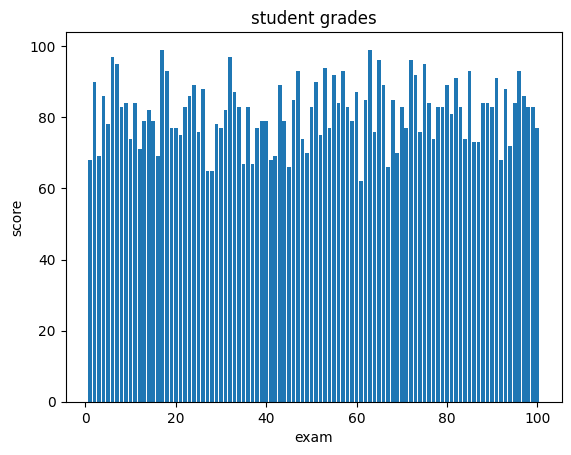

In [7]:
import matplotlib.pyplot as plt

grades = [68.0, 90.0, 69.0, 86.0, 78.0, 97.0, 95.0, 83.0, 84.0, 74.0, 84.0, 71.0, 79.0, 82.0, 79.0, 69.0, 99.0, 93.0, 
 77.0, 77.0, 75.0, 83.0, 86.0, 89.0, 76.0, 88.0, 65.0, 65.0, 78.0, 77.0, 82.0, 97.0, 87.0, 83.0, 67.0, 83.0, 
 67.0, 77.0, 79.0, 79.0, 68.0, 69.0, 89.0, 79.0, 66.0, 85.0, 93.0, 74.0, 70.0, 83.0, 90.0, 75.0, 94.0, 77.0, 
 92.0, 84.0, 93.0, 83.0, 79.0, 87.0, 62.0, 85.0, 99.0, 76.0, 96.0, 89.0, 66.0, 85.0, 70.0, 83.0, 77.0, 96.0, 
 92.0, 76.0, 95.0, 84.0, 74.0, 83.0, 83.0, 89.0, 81.0, 91.0, 83.0, 74.0, 93.0, 73.0, 73.0, 84.0, 84.0, 83.0, 
 91.0, 68.0, 88.0, 72.0, 84.0, 93.0, 86.0, 83.0, 83.0, 77.0]
 
xAxis = range(1,len(grades)+1)
plt.bar(xAxis,grades)
plt.title('student grades')
plt.xlabel('exam')
plt.ylabel('score')
plt.show()

We notice that the grades data is crowded.  We need to add meaning to <br>
the visualization of this data.  We do this by aggregating the data.<br>
<br>

<h2>Exercise</h2>
If we have a group of numbers from 0 to 20 how can we set the boundaries <br>
For creating a frequency distribution histogram in quartiles<br>

In [8]:
import math
#create quartiles
interval = math.ceil(20/4)
quartiles = {1:[],2:[],3:[],4:[]}
val = 0
for k,v in quartiles.items():
        quartiles[k] = [val+(interval*int(k-1)),val + interval*int(k)]
print(quartiles)

{1: [0, 5], 2: [5, 10], 3: [10, 15], 4: [15, 20]}


<h4>Deciles</h4>
Break the data set into 10 equal parts and chart the number of items that<br>
fall within each boundary.

<h2>Exercise</h2>
Creating the boundaries for the deciles consists of dividing the range into<br>
10 intervals.  Create a function to calculate the boundaries for deciles of<br>
a data set the goes from 50 to 100.

<h4>Solution</h4>

In [18]:
import math

interval = math.ceil(50/10)
deciles = {1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[]}
val = 50
for k,v in deciles.items():
        deciles[k] = [val+(interval*int(k-1)),val + interval*int(k)]
print(deciles)

{1: [50, 55], 2: [55, 60], 3: [60, 65], 4: [65, 70], 5: [70, 75], 6: [75, 80], 7: [80, 85], 8: [85, 90], 9: [90, 95], 10: [95, 100]}


<h4>Frequency distribution chart</h4>

{1: [62.0, 66.0], 2: [66.0, 70.0], 3: [70.0, 74.0], 4: [74.0, 78.0], 5: [78.0, 82.0], 6: [82.0, 86.0], 7: [86.0, 90.0], 8: [90.0, 94.0], 9: [94.0, 98.0], 10: [98.0, 102.0]}
[3, 10, 6, 16, 9, 25, 11, 11, 7, 2]


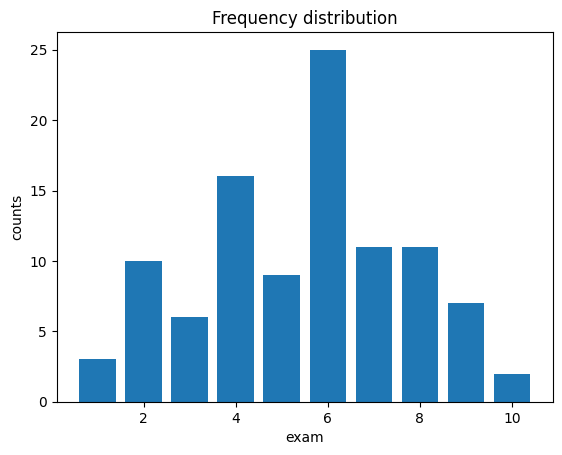

In [9]:
import matplotlib.pyplot as plt
import math


#create boundaries
interval = math.ceil((max(grades)-min(grades))/10)
deciles = {1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[]}
val = 0
min_grade = min(grades)
counts = []
for k,v in deciles.items():
        beg = min_grade+(interval*int(k-1))
        end = min_grade + interval*int(k)
        deciles[k] = [beg,end]
        sum_int = sum([1 for x in grades if x>= beg and x< end])
        counts.append(sum_int)
print(deciles)
print(counts)
xAxis = range(1,11)
plt.bar(xAxis,counts)
plt.title('Frequency distribution')
plt.xlabel('exam')
plt.ylabel('counts')
plt.show()

<h4>Cumulative Frequency distribution chart</h4>

{1: [62.0, 66.0], 2: [66.0, 70.0], 3: [70.0, 74.0], 4: [74.0, 78.0], 5: [78.0, 82.0], 6: [82.0, 86.0], 7: [86.0, 90.0], 8: [90.0, 94.0], 9: [94.0, 98.0], 10: [98.0, 102.0]}
[3, 13, 19, 35, 44, 69, 80, 91, 98, 100]


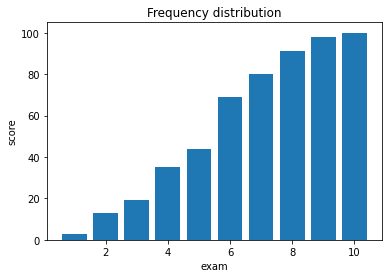

In [ ]:
import matplotlib.pyplot as plt
import math

grades = [68.0, 90.0, 69.0, 86.0, 78.0, 97.0, 95.0, 83.0, 84.0, 74.0, 84.0, 71.0, 79.0, 82.0, 79.0, 69.0, 99.0, 93.0, 
 77.0, 77.0, 75.0, 83.0, 86.0, 89.0, 76.0, 88.0, 65.0, 65.0, 78.0, 77.0, 82.0, 97.0, 87.0, 83.0, 67.0, 83.0, 
 67.0, 77.0, 79.0, 79.0, 68.0, 69.0, 89.0, 79.0, 66.0, 85.0, 93.0, 74.0, 70.0, 83.0, 90.0, 75.0, 94.0, 77.0, 
 92.0, 84.0, 93.0, 83.0, 79.0, 87.0, 62.0, 85.0, 99.0, 76.0, 96.0, 89.0, 66.0, 85.0, 70.0, 83.0, 77.0, 96.0, 
 92.0, 76.0, 95.0, 84.0, 74.0, 83.0, 83.0, 89.0, 81.0, 91.0, 83.0, 74.0, 93.0, 73.0, 73.0, 84.0, 84.0, 83.0, 
 91.0, 68.0, 88.0, 72.0, 84.0, 93.0, 86.0, 83.0, 83.0, 77.0]

#create boundaries
interval = math.ceil((max(grades)-min(grades))/10)
deciles = {1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[]}
val = 0
min_grade = min(grades)
grade_dist = []
for k,v in deciles.items():
        beg = min_grade+(interval*int(k-1))
        end = min_grade + interval*int(k)
        deciles[k] = [beg,end]
        sum_int = sum([1 for x in grades if x< end])
        grade_dist.append(sum_int)
print(deciles)
print(grade_dist)
xAxis = range(1,11)
plt.bar(xAxis,grade_dist)
plt.title('Frequency distribution')
plt.xlabel('exam')
plt.ylabel('score')
plt.show()

<h2>Exercise</h2>
Suppose we have data like the following:<br>
<code>
sat_scores = [540, 590, 780, 720, 680, 570, 590, 600, 600, 610]
</code>
<br>
Calculate what percentage of students are above the 50th percentile and what percentage<br>
score below the 50th percentile<br>
HINT: You need to calculate the median of the data set<br>